In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
train_dir = '/content/drive/MyDrive/melanoma_cancer_dataset/train'
skin = os.listdir(train_dir)

In [6]:
skin

['malignant', 'benign']

In [7]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for s in skin:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
malignant,4605
benign,5001


In [8]:
# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)


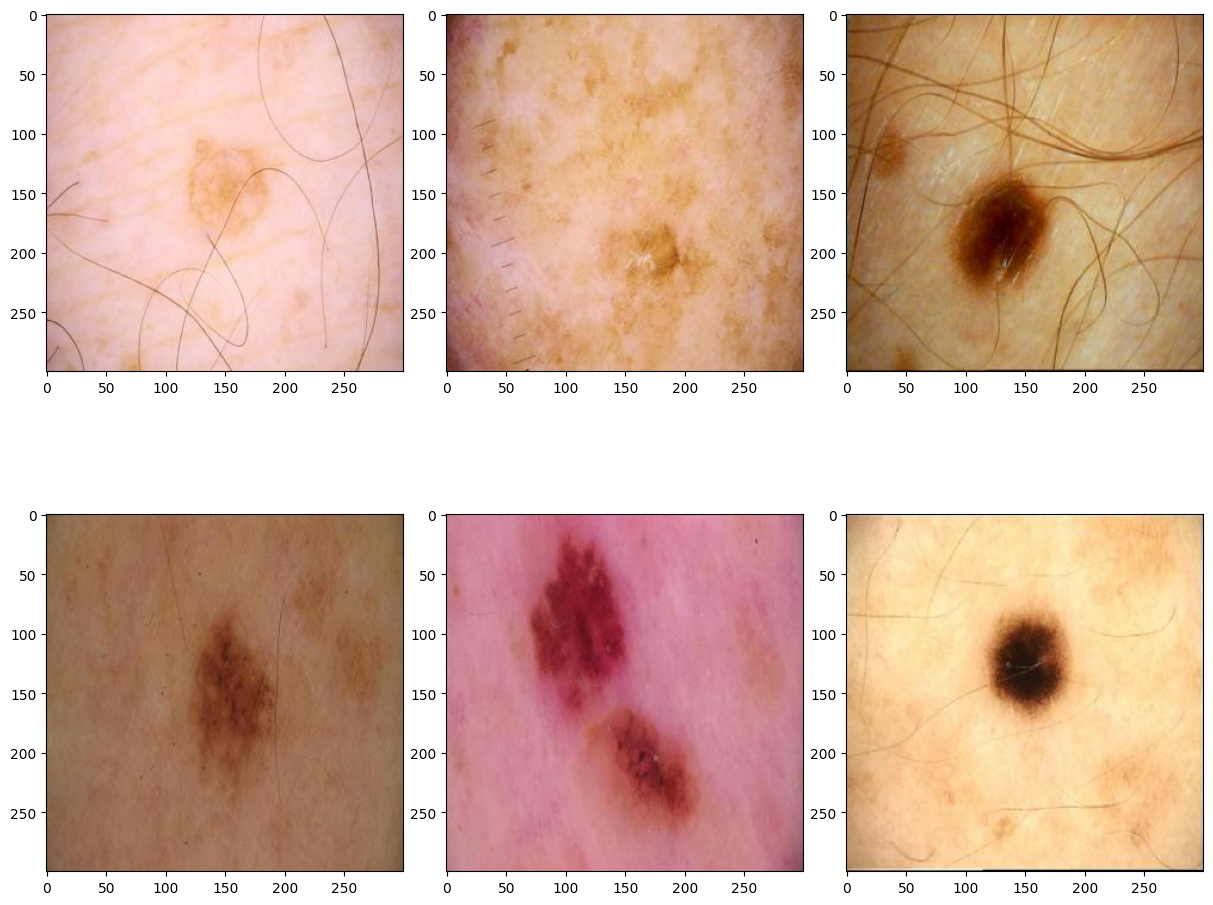

In [9]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[1]))
axs[0,1].imshow(show_image(*train[260]))
axs[1, 0].imshow(show_image(*train[850]))
axs[1,1].imshow(show_image(*train[930]))
axs[0,2].imshow(show_image(*train[1250]))
axs[1,2].imshow(show_image(*train[1380]))

Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)


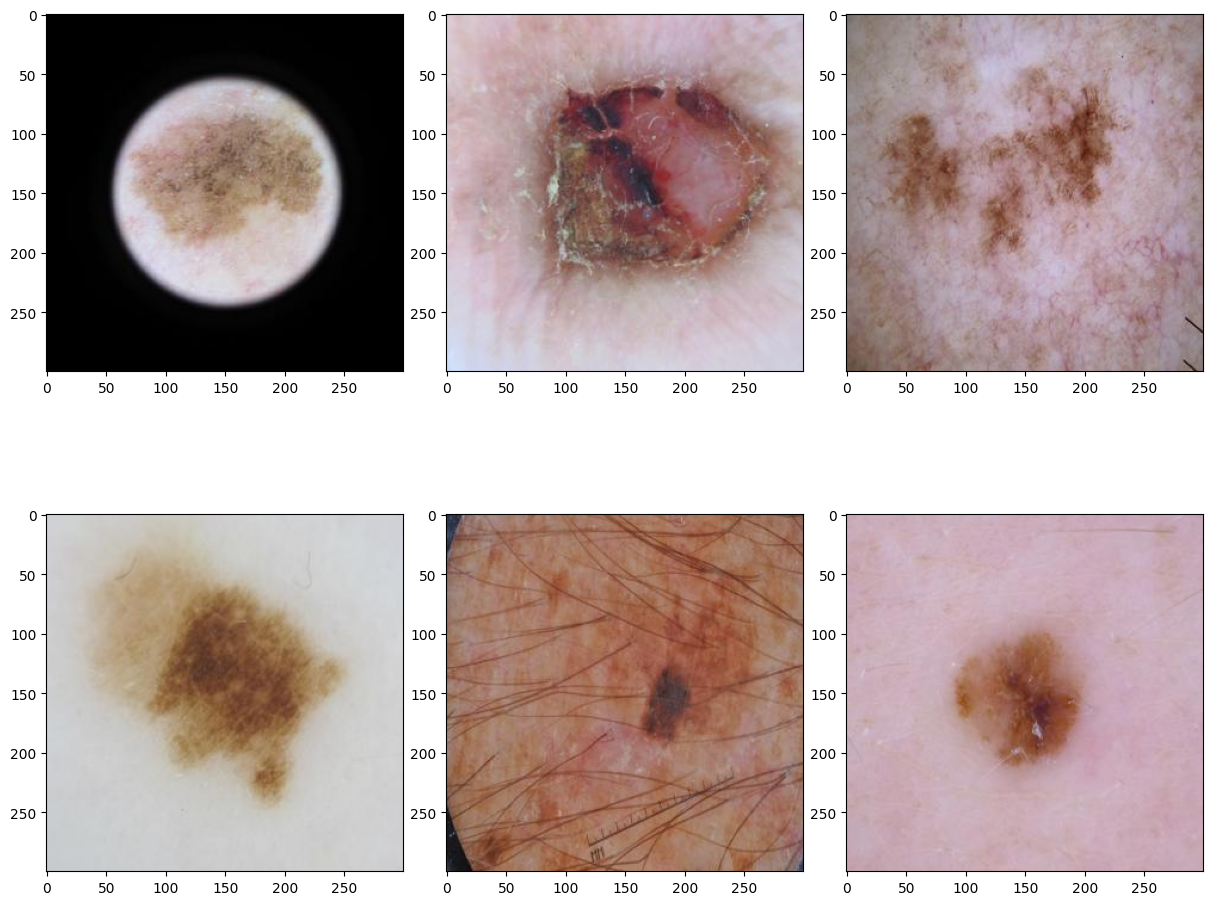

In [10]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[7000]))
axs[1, 0].imshow(show_image(*train[8000]))
axs[1,1].imshow(show_image(*train[9000]))
axs[0,2].imshow(show_image(*train[9500]))
axs[1,2].imshow(show_image(*train[9600]))

In [11]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range = 20 ,horizontal_flip = True ,validation_split = 0.25)
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.25)
train_data = train_gen.flow_from_directory(train_dir, subset='training', target_size=(224,224), batch_size=64, color_mode='rgb', class_mode='categorical', shuffle=True)
test_data = valid_gen.flow_from_directory(train_dir, subset='validation', target_size=(224,224), batch_size=64, color_mode='rgb', class_mode='categorical', shuffle=False)

Found 7205 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


In [12]:
model = keras.models.Sequential()

model .add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model .add(keras.layers.Dropout(0.1))
model .add(keras.layers.MaxPooling2D())

model .add(keras.layers.Conv2D(64, 3, activation='relu'))
model .add(keras.layers.Dropout(0.15))
model .add(keras.layers.MaxPooling2D())
model .add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(256, 3, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit_generator(train_data,validation_data=test_data,epochs = 15)

<ipython-input-14-2f6a0351228d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,validation_data=test_data,epochs = 15)


Epoch 1/15
113/113 [==============================] - 1168s 10s/step - loss: 0.6081 - accuracy: 0.7294 - val_loss: 0.4543 - val_accuracy: 0.7751
Epoch 2/15
113/113 [==============================] - 114s 1s/step - loss: 0.3494 - accuracy: 0.8490 - val_loss: 0.3826 - val_accuracy: 0.8592
Epoch 3/15
113/113 [==============================] - 115s 1s/step - loss: 0.3078 - accuracy: 0.8730 - val_loss: 0.3992 - val_accuracy: 0.8646
Epoch 4/15
113/113 [==============================] - 115s 1s/step - loss: 0.2872 - accuracy: 0.8787 - val_loss: 0.3555 - val_accuracy: 0.8734
Epoch 5/15
113/113 [==============================] - 113s 1s/step - loss: 0.2889 - accuracy: 0.8772 - val_loss: 0.4257 - val_accuracy: 0.8630
Epoch 6/15
113/113 [==============================] - 114s 1s/step - loss: 0.2852 - accuracy: 0.8783 - val_loss: 0.2892 - val_accuracy: 0.8938
Epoch 7/15
113/113 [==============================] - 116s 1s/step - loss: 0.2674 - accuracy: 0.8847 - val_loss: 0.4228 - val_accuracy: 0.86

In [15]:
from sklearn.metrics import classification_report

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 8s 213ms/step
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      1250
           1       0.79      0.94      0.86      1151

    accuracy                           0.85      2401
   macro avg       0.86      0.86      0.85      2401
weighted avg       0.87      0.85      0.85      2401



In [40]:
model.save('skin_cancer_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


# Function to make predictions for a single image and return the class label with the highest probability
def predict_skin_cancer(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)[0]
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[predicted_class_index]

    class_labels = ['benign', 'malignant']
    predicted_class = class_labels[predicted_class_index]
    return predicted_class, predicted_probability

image_path = '/content/drive/MyDrive/melanoma_cancer_dataset/test/benign/melanoma_10050.jpg'
predicted_class, predicted_probability = predict_skin_cancer(image_path)

print(f'Predicted class: {predicted_class}')
print(f'Probability of predicted class: {predicted_probability:.2f}')


1/1 [==============================] - 0s 18ms/step
Predicted class: malignant
Probability of predicted class: 0.87
